In [1]:
import pandas as pd
import json
#load the raw data  from the json
 #reference: https://sentry.io/answers/write-json-data-to-a-file-in-python/

with open("data/result_2.json", "r") as file:
    data = json.load(file)

df = pd.DataFrame(data)
df

#filter & clean data

movies = {
    "title": [],
    "genres": [], 
    "year": [],
    "budget": [],
    "revenue": []
}

for movie in data:
    movies["title"].append(movie["title"])
    movies["genres"].append([g.get("name") for g in movie.get("genres")])
    movies["year"].append(int(movie["release_date"][0:4]))
    movies["budget"].append(movie["budget"])
    movies["revenue"].append(movie["revenue"])
    

df = pd.DataFrame(movies)
#df
df.head(10)

,title,genres,year,budget,revenue
0,Avatar,"[Action, Adventure, Fantasy, Science Fiction]",2009,237000000,2923706026
1,Avengers: Endgame,"[Adventure, Science Fiction, Action]",2019,356000000,2799439100
2,Avatar: The Way of Water,"[Science Fiction, Adventure, Action]",2022,460000000,2320250281
3,Titanic,"[Drama, Romance]",1997,200000000,2264162353
4,Star Wars: The Force Awakens,"[Adventure, Action, Science Fiction]",2015,245000000,2068223624
5,Avengers: Infinity War,"[Adventure, Action, Science Fiction]",2018,300000000,2052415039
6,Spider-Man: No Way Home,"[Action, Adventure, Science Fiction]",2021,200000000,1921847111
7,Inside Out 2,"[Animation, Family, Adventure, Comedy, Drama]",2024,200000000,1682636477
8,Jurassic World,"[Action, Adventure, Science Fiction, Thriller]",2015,150000000,1671537444
9,The Lion King,"[Adventure, Drama, Family, Animation]",2019,260000000,1663000000


## Assessment 3 Work


In [2]:
# Adjusting movie budget and revenue in the "df" for inflation
# csv containing Consumer Price Index (CPI) in the US has been downloaded. reference: https://fred.stlouisfed.org/series/CPIAUCSL

# reference: https://www.w3schools.com/python/pandas/pandas_csv.asp
## df = pd.read_csv

inflationDF = pd.read_csv("data/CPIAUCSL.csv")
inflationDF


# class material reference: #df[["name", "HP"]] #locating columns

# reference : https://stackoverflow.com/questions/30405413/pandas-extract-year-from-datetime-dfyear-dfdate-year-is-not-working
## df['date'] = pd.to_datetime(df['date'])
## df['year'] = df['date'].dt.year

# reference : https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html#min-tut-06-stats
## titanic[["Sex", "Age"]].groupby("Sex").mean()

inflationDF["date"] = pd.to_datetime(inflationDF["DATE"])
inflationDF["YEAR"] = inflationDF["date"].dt.year

yearly_infalations = inflationDF[["YEAR", "CPIAUCSL"]].groupby("YEAR").median()

# reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
## df.reset_index()
## When we reset the index, the old index is added as a column, and a new sequential index is used

yearly_infalations = yearly_infalations.reset_index()
yearly_infalations.rename(columns={"YEAR" : "year"}, inplace=True)

yearly_infalations

,year,CPIAUCSL
0,1947,22.1550
1,1948,24.1000
2,1949,23.8300
3,1950,23.9750
4,1951,25.9250
...,...,...
73,2020,259.0760
74,2021,271.3290
75,2022,294.9865
76,2023,304.3155


In [3]:
#The goal is to adjust the revenues and budget of each movie for inflation using CPI
# We weill add adjustedBudget and adjustedRevenues columns to our data frame
# To achieve adjustedBudget & adjustedRevenues we will add CPI to each movie (movie year) and then use the following formula
# reference: https://www.bls.gov/cpi/factsheets/escalation.htm
## CPI for current period	232.945
## Less CPI for previous period	229.815
## Equals index point change	3.130
## Divided by previous period CPI	229.815
## Equals	0.0136

# using the base year 2024, we will add inflation to the yearly_infalations data frame

base_year_CPI = yearly_infalations[yearly_infalations["year"] == 2024]
base_year_CPI

#refence: https://stackoverflow.com/questions/70931002/pandas-get-cell-value-by-row-index-and-column-name
## df.loc[3, 'age']
base_year_CPI = base_year_CPI.loc[77, 'CPIAUCSL']
base_year_CPI


yearly_infalations["CPI"] = (base_year_CPI - yearly_infalations["CPIAUCSL"]) /  yearly_infalations["CPIAUCSL"]

yearly_infalations

,year,CPIAUCSL,CPI
0,1947,22.1550,13.137486
1,1948,24.1000,11.996515
2,1949,23.8300,12.143768
3,1950,23.9750,12.064275
4,1951,25.9250,11.081620
...,...,...,...
73,2020,259.0760,0.208973
74,2021,271.3290,0.154377
75,2022,294.9865,0.061798
76,2023,304.3155,0.029248


In [4]:
# Now we can add CPI to our top 100 movies by revenue
# then we can add adjustedBudget and adjustedRevenues columns to our movie data frame

#MERGIN THE TWO DATA FRAMES ON THE BASES OF COLUMNS YEAR
# reference: https://datascience.stackexchange.com/questions/33053/how-do-i-compare-columns-in-different-data-frames
## mergedStuff = pd.merge(df1, df2, on=['Name'], how='inner')
# & https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
## df1.merge(df2, how='inner', on='a')

mergedDF = df.merge(yearly_infalations, how="inner",  on=["year"])

mergedDF["adjustedBudget"] = mergedDF["budget"] + (mergedDF["budget"] * mergedDF["CPI"])
mergedDF["adjustedRevenues"] = mergedDF["revenue"] + (mergedDF["revenue"] * mergedDF["CPI"])



# refrence: https://stackoverflow.com/questions/658763/how-to-suppress-scientific-notation-when-printing-float-values
## pd.options.display.float_format = '{:.2f}'.format
pd.options.display.float_format = '{:.2f}'.format

mergedDF


,title,genres,year,budget,revenue,CPIAUCSL,CPI,adjustedBudget,adjustedRevenues
0,Avatar,"[Action, Adventure, Fantasy, Science Fiction]",2009,237000000,2923706026,214.76,0.46,345655072.22,4264108934.89
1,Avengers: Endgame,"[Adventure, Science Fiction, Action]",2019,356000000,2799439100,255.55,0.23,436334699.02,3431158475.07
2,Avatar: The Way of Water,"[Science Fiction, Adventure, Action]",2022,460000000,2320250281,294.99,0.06,488426961.91,2463636512.23
3,Titanic,"[Drama, Romance]",1997,200000000,2264162353,160.30,0.95,390787273.86,4424029167.54
4,Star Wars: The Force Awakens,"[Adventure, Action, Science Fiction]",2015,245000000,2068223624,237.58,0.32,323001631.05,2726692260.90
...,...,...,...,...,...,...,...,...,...
95,Inception,"[Action, Science Fiction, Adventure]",2010,160000000,825532764,217.55,0.44,230362520.20,1188573800.13
96,Wonder Woman,"[Action, Adventure, Fantasy]",2017,149000000,823970682,244.22,0.28,191096413.86,1056764043.33
97,"Hi, Mom","[Drama, Comedy, Fantasy]",2021,59000000,822049668,271.33,0.15,68108252.34,948955359.77
98,Spider-Man,"[Action, Science Fiction]",2002,139000000,821708551,179.80,0.74,242141401.56,1431436404.39


## Data Visualisation
### NB: the following cells were not created in this sequence/order

,title,genres,year,budget,revenue,CPIAUCSL,CPI,adjustedBudget,adjustedRevenues
0,Avatar,"[Action, Adventure, Fantasy, Science Fiction]",2009,237000000,2923706026,214.76,0.46,345655072.22,4264108934.89
1,Avengers: Endgame,"[Adventure, Science Fiction, Action]",2019,356000000,2799439100,255.55,0.23,436334699.02,3431158475.07
2,Avatar: The Way of Water,"[Science Fiction, Adventure, Action]",2022,460000000,2320250281,294.99,0.06,488426961.91,2463636512.23
3,Titanic,"[Drama, Romance]",1997,200000000,2264162353,160.30,0.95,390787273.86,4424029167.54
4,Star Wars: The Force Awakens,"[Adventure, Action, Science Fiction]",2015,245000000,2068223624,237.58,0.32,323001631.05,2726692260.90
...,...,...,...,...,...,...,...,...,...
95,Inception,"[Action, Science Fiction, Adventure]",2010,160000000,825532764,217.55,0.44,230362520.20,1188573800.13
96,Wonder Woman,"[Action, Adventure, Fantasy]",2017,149000000,823970682,244.22,0.28,191096413.86,1056764043.33
97,"Hi, Mom","[Drama, Comedy, Fantasy]",2021,59000000,822049668,271.33,0.15,68108252.34,948955359.77
98,Spider-Man,"[Action, Science Fiction]",2002,139000000,821708551,179.80,0.74,242141401.56,1431436404.39


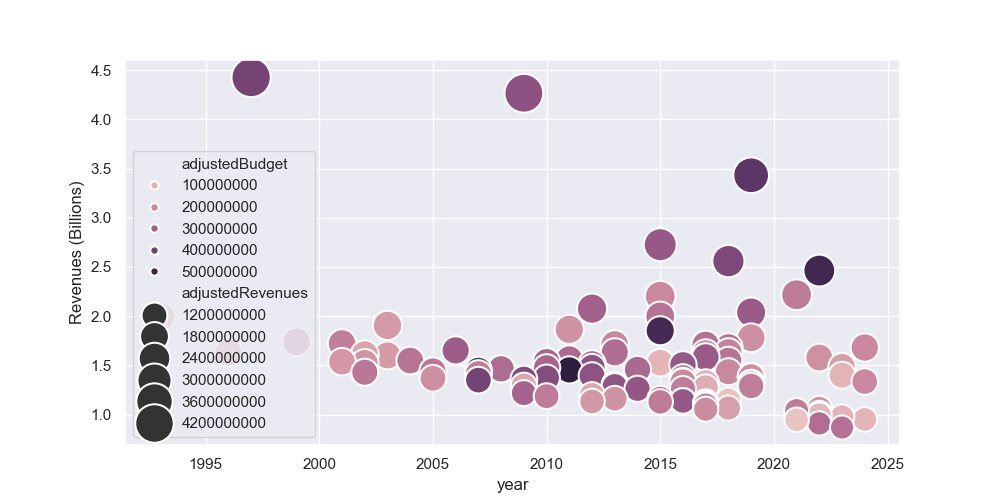

In [5]:
# DATA ANALYSIS
# Analysing movie revenues by creating a timeline of movie releases and earnings
%matplotlib widget
import matplotlib.pyplot as plt
import seaborn as sns

#reference: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
## sizes=(20, 200),

sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 5))
sns.scatterplot(x="year", y=mergedDF["adjustedRevenues"]/1_000_000_000, hue="adjustedBudget",   size="adjustedRevenues", sizes=(300, 800), data=mergedDF)

plt.ylabel("Revenues (Billions)")

## Correlation of grouped revenues and years
# reference: https://stackoverflow.com/questions/42579908/use-corr-to-get-the-correlation-between-two-columns
## df['A'].corr(df['B'])


# reference: https://stackoverflow.com/questions/24525111/how-can-i-get-the-output-of-a-matplotlib-plot-as-an-svg
#plt.savefig("images/figure–1.svg")
mergedDF


,title,genres,year,budget,revenue,CPIAUCSL,CPI,adjustedBudget,adjustedRevenues
3,Titanic,"[Drama, Romance]",1997,200000000,2264162353,160.30,0.95,390787273.86,4424029167.54
0,Avatar,"[Action, Adventure, Fantasy, Science Fiction]",2009,237000000,2923706026,214.76,0.46,345655072.22,4264108934.89
1,Avengers: Endgame,"[Adventure, Science Fiction, Action]",2019,356000000,2799439100,255.55,0.23,436334699.02,3431158475.07
4,Star Wars: The Force Awakens,"[Adventure, Action, Science Fiction]",2015,245000000,2068223624,237.58,0.32,323001631.05,2726692260.90
5,Avengers: Infinity War,"[Adventure, Action, Science Fiction]",2018,300000000,2052415039,251.12,0.25,374188821.10,2559969212.86
2,Avatar: The Way of Water,"[Science Fiction, Adventure, Action]",2022,460000000,2320250281,294.99,0.06,488426961.91,2463636512.23
6,Spider-Man: No Way Home,"[Action, Adventure, Science Fiction]",2021,200000000,1921847111,271.33,0.15,230875431.67,2218536406.79
8,Jurassic World,"[Action, Adventure, Science Fiction, Thriller]",2015,150000000,1671537444,237.58,0.32,197756100.64,2203711513.34
10,The Avengers,"[Science Fiction, Action, Adventure]",2012,220000000,1518815515,229.00,0.37,300910142.93,2077395425.91
9,The Lion King,"[Adventure, Drama, Family, Animation]",2019,260000000,1663000000,255.55,0.23,318671409.40,2038271360.87


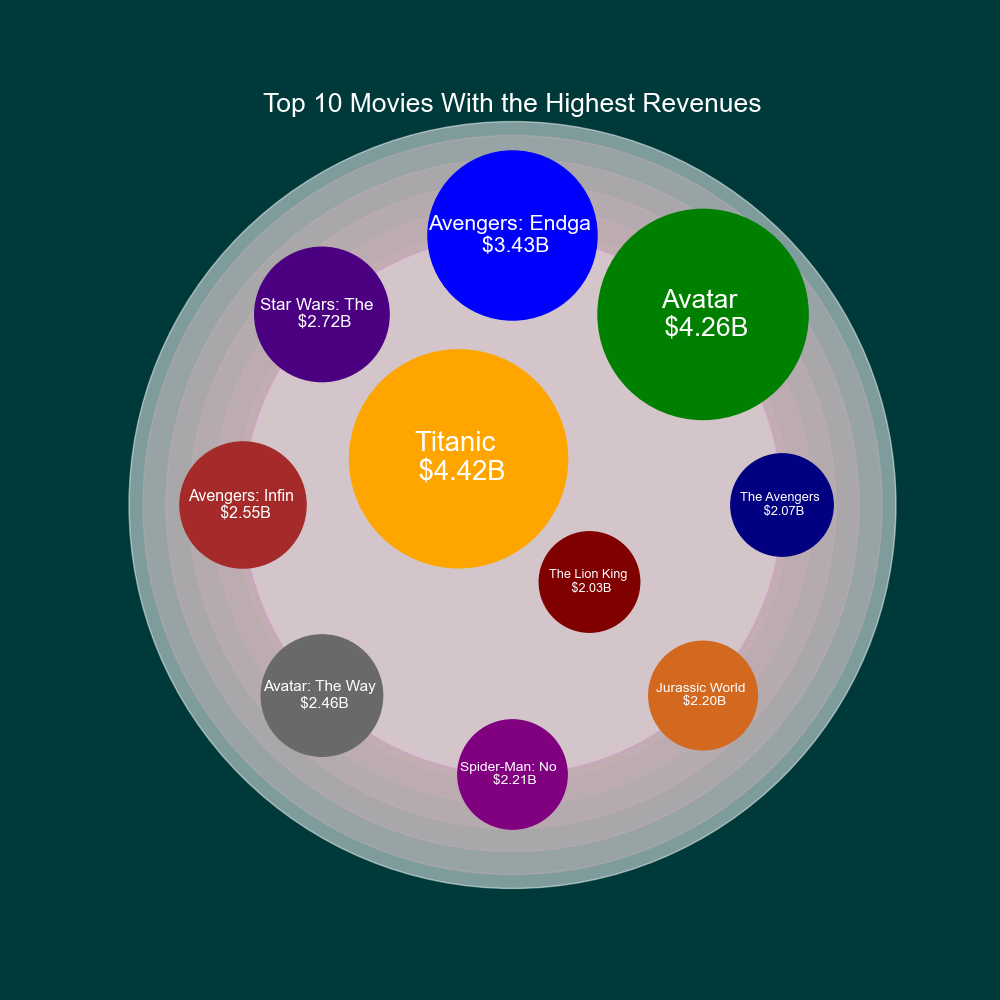

In [6]:
import math
# DATA ANALYSIS
# Visualising top 10 movies with the highest revenues

# drawing circle logic (the following JavaScript? code was the closest logic for plotting around the circle; I could find)
# reference: https://stackoverflow.com/questions/78164020/plotting-points-around-a-circle-non-uniformly
## var angleIncrement = (2 * Math.PI) / numPoints;
##for (var i = 0; i < numPoints; i++) {
##  var angle = i * angleIncrement;
##  var x = centerX + radius * Math.cos(angle);
##  var y = centerY + radius * Math.sin(angle); .......

# reference: https://www.geeksforgeeks.org/how-to-set-plot-background-color-in-matplotlib/
## plt.figure(facecolor='yellow')
## ax.set_facecolor("violet")
    # reference: https://stackoverflow.com/questions/50172905/center-a-label-inside-a-circle-with-matplotlib
    ## ax.add_patch(circle)
    ## label = ax.annotate("cpicpi", xy=(x, y), fontsize=30, ha="center")
    # reference: https://stackoverflow.com/questions/54831344/matplotlib-plt-text-with-user-defined-circle-radii
    ## va="center",


#analysing budget revenue correlation
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
##df.sort_values(by=['col1'])
##df.sort_values(by='col1', ascending=False, na_position='first')
top_10_highest_budget = mergedDF.sort_values(by='adjustedRevenues', ascending=False, na_position='first').head(10)

# reference: https://stackoverflow.com/questions/14908576/how-to-remove-frame-from-a-figure
## ax.axis('off')
## fig.patch.set_visible(False)
fig = plt.figure(figsize=(10, 10), facecolor="#003939") 
ax = plt.gca()         
ax.set_xlim(0, 10)    
ax.set_ylim(0, 10)      
ax.set_facecolor("violet")
ax.set_aspect('equal') 
ax.axis("off")
plt.title(("Top 10 Movies With the Highest Revenues"), color="white", fontsize=19)

#fig.patch.set_visible(False)

main_circle = plt.Circle((5, 5), 4.98, color="white", alpha=0.5)
ax.add_artist(main_circle)

for numb in range(5):
    wave = plt.Circle((5, 5), 3.6 + (numb * 0.3), color="pink", alpha=0.08 + (numb * 0.03))
    ax.add_artist(wave)



inner_circle1 = plt.Circle((5, 5), 3.5,  color="white", ec="violet", alpha=0.3)
ax.add_artist(inner_circle1)


colors = ["orange", "green", "blue", "indigo", "brown", "dimgray", "purple", "chocolate", "navy", "maroon", "olive", "teal"]

data_length = len(top_10_highest_budget )
angle_increment = (2* math.pi) / (data_length - 2)

for  index in range(data_length):
    movie_name = top_10_highest_budget.iloc[index].values[0] #refenced above - groubed_genres_year_size.columns.values[2] = "count" 
    movie_revenue =  top_10_highest_budget.iloc[index].values[8] / 1_000_000_000
    movie_radius = top_10_highest_budget.iloc[index].values[8] / 1_000_000_000 * 0.32
    angle = index * angle_increment
    inner_circle1_r = 3.5
    inner_circle1_centerX = 5
    inner_circle1_centerY = 5
    if(int(movie_revenue * 1_000_000_000) == int(top_10_highest_budget["adjustedRevenues"].values.max())):
        x = 4.3
        y = 5.6
    elif(int(movie_revenue * 1_000_000_000) == int(top_10_highest_budget["adjustedRevenues"].values.min())):
        x = 6
        y = 4
    else:
        x = inner_circle1_centerX + inner_circle1_r * math.cos(angle)
        y = inner_circle1_centerY + inner_circle1_r * math.sin(angle)
    
    current_circle = plt.Circle((x, y), movie_radius, color=colors[index])
    ax.add_patch(current_circle)   #refrenced on top of this cell
    label = ax.annotate(f"{movie_name[0:15]} \n ${str(movie_revenue)[0:4]}B", xy=(x, y), fontsize=movie_radius *14, ha="center", va="center", color="white")  #refrenced on top of this cell
    #print("x is: ",x, "y is: ", y )
    index += 1


top_10_highest_budget

# reference: https://stackoverflow.com/questions/24525111/how-can-i-get-the-output-of-a-matplotlib-plot-as-an-svg
#plt.savefig("images/figure–2.svg")

,title,genres,year,budget,revenue,CPIAUCSL,CPI,adjustedBudget,adjustedRevenues
71,Jurassic Park,"[Adventure, Science Fiction]",1993,63000000,920100000,144.40,1.17,136652409.97,1995775911.36
99,Independence Day,"[Action, Adventure, Science Fiction]",1996,75000000,817400891,156.85,1.00,149768568.70,1632279486.61
3,Titanic,"[Drama, Romance]",1997,200000000,2264162353,160.30,0.95,390787273.86,4424029167.54
70,Star Wars: Episode I - The Phantom Menace,"[Adventure, Action, Science Fiction]",1999,115000000,924317558,166.35,0.88,216530447.85,1740372998.18
83,The Lord of the Rings: The Fellowship of the Ring,"[Adventure, Fantasy, Action]",2001,93000000,871368364,177.40,0.77,164200045.10,1538480910.36
...,...,...,...,...,...,...,...,...,...
92,Guardians of the Galaxy Vol. 3,"[Science Fiction, Adventure, Action]",2023,250000000,845600000,304.32,0.03,257311901.63,870331776.07
14,Barbie,"[Comedy, Adventure]",2023,145000000,1445638421,304.32,0.03,149240902.94,1487919884.70
19,Deadpool & Wolverine,"[Action, Comedy, Science Fiction]",2024,200000000,1336816112,313.22,0.00,200000000.00,1336816112.00
7,Inside Out 2,"[Animation, Family, Adventure, Comedy, Drama]",2024,200000000,1682636477,313.22,0.00,200000000.00,1682636477.00


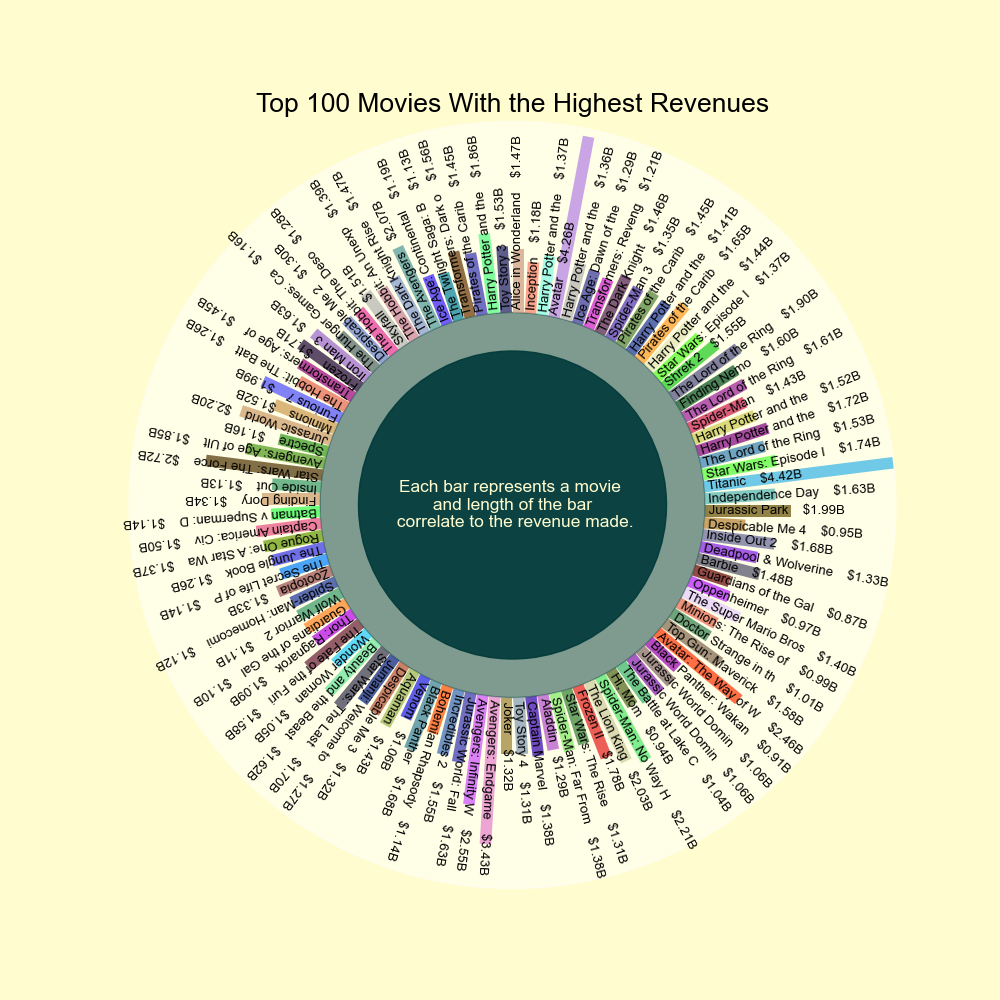

In [7]:
from matplotlib.transforms import Affine2D
from numpy import round, random

# Visualising the top 100 movies in terms of revenue

fig = plt.figure(figsize=(10, 10), facecolor="#FFFDD0") 
ax = plt.gca()         
ax.set_xlim(0, 10)    
ax.set_ylim(0, 10)      
ax.set_facecolor("violet")
ax.set_aspect("equal") 
ax.axis("off")
plt.title(("Top 100 Movies With the Highest Revenues"), color="black", fontsize=19)
#fig.patch.set_visible(False)

main_circle = plt.Circle((5, 5), 4.98, color="white", alpha=0.5)
ax.add_artist(main_circle)


inner_circle1 = plt.Circle((5, 5), 2.5,  color="#003939", alpha=0.5)
ax.annotate(f"Each bar represents a movie \n and length of the bar \n correlate to the revenue made.",
            (5, 5),  horizontalalignment="center", verticalalignment="center", fontsize=12.5, color="#FFFDD0") #referenced below in this cell
inner_circle2 = plt.Circle((5, 5), 2,  color="#003939", alpha=0.9)
ax.add_artist(inner_circle1)
ax.add_artist(inner_circle2)


year_sorted = mergedDF.sort_values("year")
data_length = len(year_sorted)
angle_increment = (2* math.pi) / (data_length)

# reference: https://mljar.com/blog/matplotlib-colors/
## r = np.round(np.random.rand(),1)
## g = np.round(np.random.rand(),1) ...
colors = []
for i in range(data_length):
    r = round(random.rand(),1)
    g = round(random.rand(),1)
    b = round(random.rand(),1)
    a = 0.7
    colors.append([r, g, b, a])


for index in range(data_length):
        angle = index * angle_increment
        # we rotate rectangles 90 degrees + 360 /data_length to increment the rotation
        # reference: https://stackoverflow.com/questions/60413174/rotating-rectangles-around-point-with-matplotlib
        ## transform=Affine2D().rotate_deg_around(*(0,0), deg)+ax.transData)
        if( angle == 0):
            deg = 0
        else:
            deg = (360/data_length) * (index)
        # the
        #print(angle,  "and theta", 90 + deg, "current place holder", 90+57.29577*angle)
        movie_name = year_sorted.iloc[index].values[0] #refenced above - groubed_genres_year_size.columns.values[2] = "count" 
        movie_revenue =  year_sorted.iloc[index].values[8] / 1_000_000_000
        movie_radius = year_sorted.iloc[index].values[8] / 1_790_000_000
    
        inner_circle1_r = 2.5
        inner_circle1_centerX = 5
        inner_circle1_centerY = 5
        x = inner_circle1_centerX + inner_circle1_r * math.cos(angle)
        y = inner_circle1_centerY + inner_circle1_r * math.sin(angle)
        # reference: https://stackoverflow.com/questions/37435369/how-to-draw-a-rectangle-on-image
        ## rect = Rectangle((50,100),40,30,linewidth=1,edgecolor='r',facecolor='none')
        rectangle = plt.Rectangle((x, y), -0.15, -movie_radius, facecolor=(colors[index]), edgecolor="none", transform=Affine2D().rotate_deg_around(*(x,y), 90+deg)+ax.transData,)
        # reference above +
        # reference: https://stackoverflow.com/questions/8482588/putting-text-in-top-left-corner-of-matplotlib-plot
        # reference: https://matplotlib.org/stable/gallery/text_labels_and_annotations/demo_text_rotation_mode.html
        ## verticalalignment='top', ......
        # https://www.geeksforgeeks.org/how-to-rotate-text-in-matplotlib-python/
        ## rotation = 30, ....
        ax.annotate(f" {movie_name[0:20]}    ${str(movie_revenue)[0:4]}B",color="black", xy=(x, y), fontsize=9.5,  horizontalalignment="left", verticalalignment="top", transform=ax.transAxes, rotation = deg, rotation_mode = "anchor")
        ax.add_artist(rectangle)

# reference: https://stackoverflow.com/questions/24525111/how-can-i-get-the-output-of-a-matplotlib-plot-as-an-svg
#plt.savefig("images/figure–3.svg")
year_sorted

,genres,year,count
0,Action,48271,60
1,Adventure,50260,79
2,Animation,28205,21
3,Comedy,26205,21
4,Crime,10071,5
5,Drama,24192,15
6,Family,28205,25
7,Fantasy,40233,33
8,History,2023,1
9,Music,2018,1


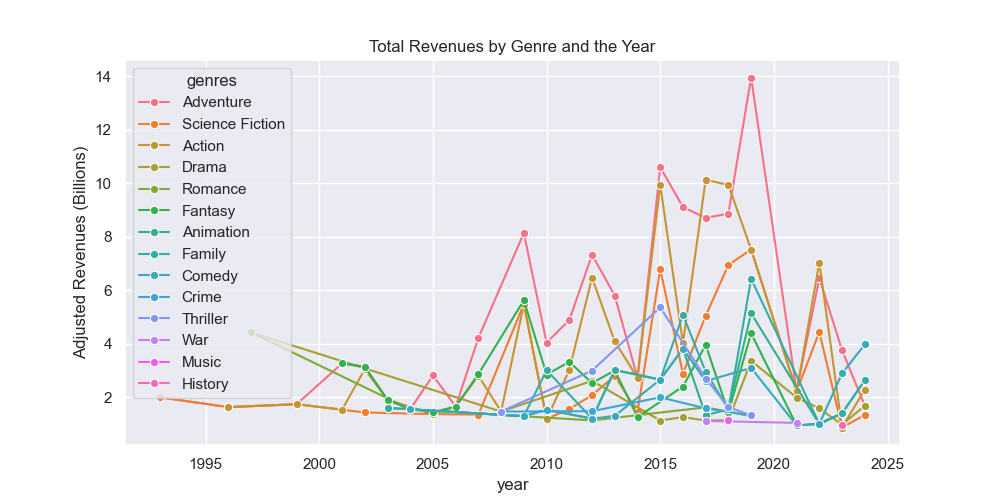

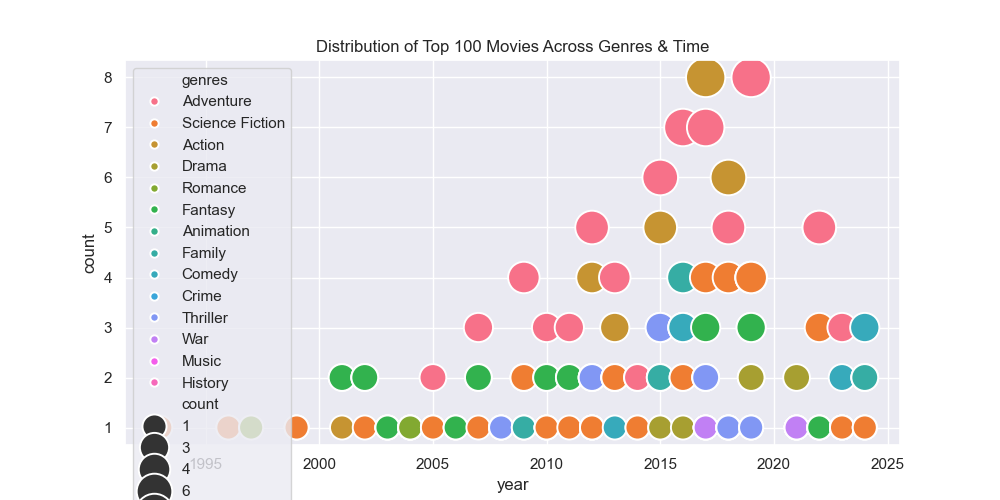

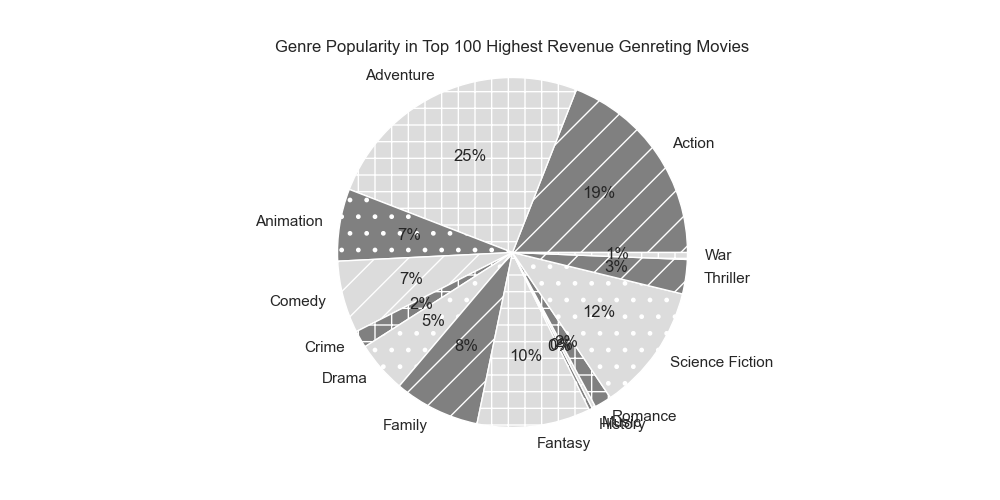

In [8]:
## Flatten genres so we so explore the popularity of genres over the years –  by looked at the revenues movies with particular genres made and budget
## We will flatten genres, then group result by genres and then look at revenues and budget
## Each movie has multiple genres
## this chart will show which genres dominate the top 100 movies

# reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html
## df.explode('A')
flat_genres = mergedDF.explode("genres")

#the data frame is grouped into a year and genres, this will sum genres each year, which will sum revenues each genres made each year in the top 100 movies
# reference: https://stackoverflow.com/questions/17679089/pandas-dataframe-groupby-two-columns-and-get-counts
## df.groupby(['col5', 'col2']).size()
grouped_genres_years = flat_genres.groupby(["year", "genres"]).sum().reset_index()


plt.figure(figsize=(10, 5))
sns.lineplot(data=grouped_genres_years, x="year", y=grouped_genres_years["adjustedRevenues"]/1_000_000_000, hue="genres", marker="o")
plt.ylabel("Adjusted Revenues (Billions)")
plt.title("Total Revenues by Genre and the Year")

#plt.savefig("images/figure–4.svg")

# Data grouped again by genre 
# reference: https://sparkbyexamples.com/pandas/pandas-rename-column-by-index/#:~:text=If%20you%20want%20to%20rename,where%20you%20wanted%20to%20rename.
## df.columns.values[1] = 'Courses_Fee'
groubed_genres_year_size = flat_genres.groupby(["year","genres"]).size().reset_index()
groubed_genres_year_size.columns.values[2] = "count"
plt.figure(figsize=(10, 5))
sns.scatterplot(data=groubed_genres_year_size, x="year", y=groubed_genres_year_size["count"], hue="genres",  size="count", sizes=(300, 800))
plt.title("Distribution of Top 100 Movies Across Genres & Time")

#plt.savefig("images/figure–5.svg")

genres_popularity = groubed_genres_year_size.groupby("genres").sum().reset_index()
plt.figure(figsize=(10, 5))
plt.pie(genres_popularity["count"], labels=genres_popularity["genres"],
       colors=["grey", "gainsboro"],
       hatch=["/", "+", "."],
       autopct="%1.0f%%", # reference: https://stackoverflow.com/questions/21572870/percent-label-position-in-pie-chart ## autopct='%1.0f%%',
      )
plt.axis("equal") 
plt.title("Genre Popularity in Top 100 Highest Revenue Genreting Movies")

#grouped_genres_years
#groubed_genres_year_size
genres_popularity

# reference: https://stackoverflow.com/questions/24525111/how-can-i-get-the-output-of-a-matplotlib-plot-as-an-svg
#plt.savefig("images/figure–6.svg")

Correlation between budgets and revenues over the years: 0.9601709040673926


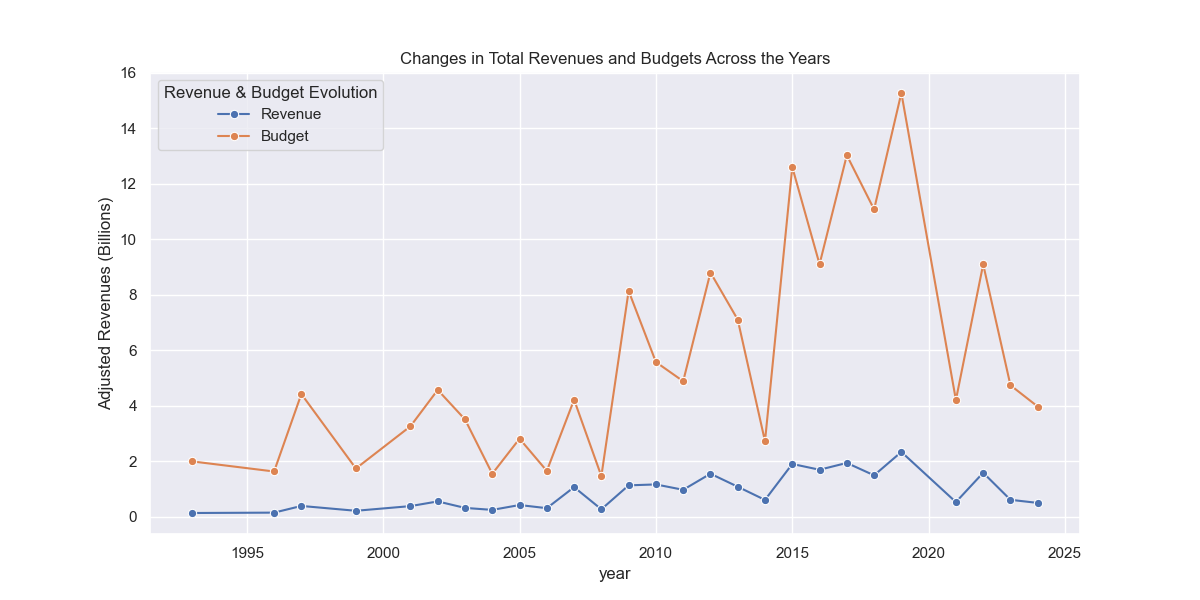

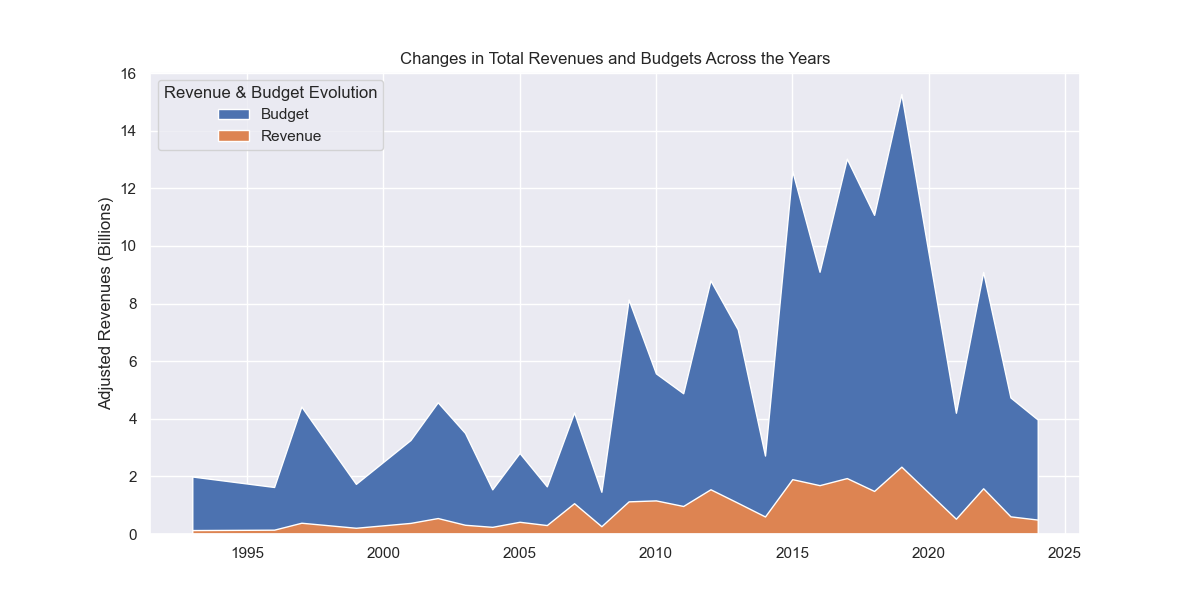

In [9]:
## Analaysing movie budget over time
## analysing the relationship between movie budget and revenue

group_by_year = mergedDF.groupby("year").sum().reset_index()
group_by_year

# reference: https://stackoverflow.com/questions/52308749/how-do-i-create-a-multiline-plot-using-seaborn
## years = list(range(1990, 1990 + num_rows))
## data_preproc = pd.DataFrame({
##    'Year': years, ...
data = pd.DataFrame({
    "year": group_by_year.year,
    "Revenue": group_by_year["adjustedBudget"]/1_000_000_000,
    "Budget": group_by_year["adjustedRevenues"]/1_000_000_000,
})

plot_data = pd.melt(data, ["year"])

plt.figure(figsize=(12, 6))
sns.lineplot(data=plot_data, x="year", y="value", hue="variable", marker="o")
plt.ylabel("Adjusted Revenues (Billions)")
plt.legend(loc="upper left", title="Revenue & Budget Evolution")
plt.title("Changes in Total Revenues and Budgets Across the Years")

#plt.savefig("images/figure–7.svg")

#reference: https://stackoverflow.com/questions/22425313/how-to-pass-a-list-of-pandas-columns-to-a-pyplot-chart
## ax.stackplot(x, df[['foo','bar']].T)  # only foo & bar columns
#reference: https://stackoverflow.com/questions/45201514/how-to-edit-a-seaborn-legend-title-and-labels-for-figure-level-functions
## plt.legend(title='Smoker', loc='upper left', labels=['Hell Yeh', 'Nah Bruh'])
#----------------------------------------------------------------------------------------------------
#plt.stackplot(
#    group_by_year["year"],
#    group_by_year[["adjustedBudget","adjustedRevenues"]].T/1_000_000_000,
#    labels = ["adjustedRevenues", "adjustedBudget"],
#)
#---------------------------------------------------------------------------------------------------
plt.figure(figsize=(12, 6))
plt.stackplot(
    group_by_year["year"],
    group_by_year[["adjustedRevenues"]].T/1_000_000_000,
    labels = ["adjustedRevenues", "adjustedBudget"],
)
plt.stackplot(
    group_by_year["year"],
    group_by_year[["adjustedBudget"]].T/1_000_000_000,
    labels = ["adjustedRevenues", "adjustedBudget"],
)
plt.ylabel("Adjusted Revenues (Billions)")
plt.legend(loc="upper left", title="Revenue & Budget Evolution", labels=["Budget", "Revenue"])
plt.title("Changes in Total Revenues and Budgets Across the Years")

# reference: https://stackoverflow.com/questions/24525111/how-can-i-get-the-output-of-a-matplotlib-plot-as-an-svg
#plt.savefig("images/figure–7b.svg")
print(f"Correlation between budgets and revenues over the years: {group_by_year["adjustedBudget"].corr(group_by_year["adjustedRevenues"])}")
#group_by_year